# Main for StockRow screener
This notebook contains code to 
1. Pull financial data from an external source 
2. Lightly clean the data
3. Perform introductory financial analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import requests
import os
import time

In [2]:
stock_list = pd.read_csv('list_of_stocks.csv')
stock_list.head(2)

,Ticker,Name,Sector,Asset Class,Market Value,Weight (%),Notional Value,Shares,CUSIP,ISIN,SEDOL,Price,Location,Exchange,Currency,FX Rate,Market Currency,Accrual Date
0,AAPL,APPLE INC,Information Technology,Equity,"1,875,566,056.60",4.85,"1,875,566,056.60","14,040,770.00",37833100,US0378331005,2046251,133.58,United States,NASDAQ,USD,1,USD,--
1,MSFT,MICROSOFT CORP,Information Technology,Equity,"1,709,995,853.92",4.42,"1,709,995,853.92","6,717,457.00",594918104,US5949181045,2588173,254.56,United States,NASDAQ,USD,1,USD,--


In [3]:
# this function pulls Income Statement data from StockRow.com
    # based on the user's choice of ticker
# and outputs a DataFrame of the Income Statement

##### btw PLEASE visit stockrow.com #####
##### they made a wonderful resource ####

## also the 'meat' of this code comes from:
## https://www.kite.com/python/answers/how-to-download-a-csv-file-from-a-url-in-python

def income_puller(ticker):
    url=f'https://stockrow.com/api/companies/{ticker}/financials.xlsx?dimension=T&section=Income%20Statement&sort=desc'
    response = requests.get(url)
    with open(os.path.join("Income", f"{ticker}_inc.xlsx"), 'wb') as f:
        f.write(response.content)
    time.sleep(0.25)
    
    ticker_df = pd.read_excel(f'./Income/{ticker}_inc.xlsx').T
    # change the first row to the columns
    ticker_df.columns = ticker_df.iloc[0]
    #remove the first row
    ticker_df = ticker_df.iloc[1:]
    
    return ticker_df

In [4]:
# this function pulls Balance Sheet data from StockRow.com

def balance_puller(ticker):
    url=f'https://stockrow.com/api/companies/{ticker}/financials.xlsx?dimension=Q&section=Balance%20Sheet&sort=desc'
    response = requests.get(url)
    with open(os.path.join("BalanceSheet", f"{ticker}_balance.xlsx"), 'wb') as f:
        f.write(response.content)
    time.sleep(0.25)
    
    ticker_df = pd.read_excel(f'./BalanceSheet/{ticker}_balance.xlsx').T
    # change the first row to the columns
    ticker_df.columns = ticker_df.iloc[0]
    #remove the first row
    ticker_df = ticker_df.iloc[1:]
    
    return ticker_df

In [5]:
# this function pulls Cash Flow statement data from StockRow.com

def cashflow_puller(ticker):
    url=f'https://stockrow.com/api/companies/{ticker}/financials.xlsx?dimension=T&section=Cash%20Flow&sort=desc'
    response = requests.get(url)
    with open(os.path.join("CashFlow", f"{ticker}_cashflow.xlsx"), 'wb') as f:
        f.write(response.content)
    time.sleep(0.25)
    
    ticker_df = pd.read_excel(f'./CashFlow/{ticker}_cashflow.xlsx').T
    # change the first row to the columns
    ticker_df.columns = ticker_df.iloc[0]
    #remove the first row
    ticker_df = ticker_df.iloc[1:]
    
    return ticker_df

In [6]:
# this function prompts the user for a ticker input
# and calls the income_puller() function to return a DataFrame
# same for balance_puller() to return Balance Sheet info
def ticker_input():
    ticker = input('Please enter a ticker').upper()
    income_df = income_puller(ticker.upper())
    balance_df = balance_puller(ticker.upper())
    cashflow_df = cashflow_puller(ticker.upper())
    return income_df, balance_df, cashflow_df, ticker

In [8]:
# call the function and print charts
income_df,balance_df, cashflow_df, ticker = ticker_input()
ticker.upper()

Please enter a ticker SWKS


'SWKS'

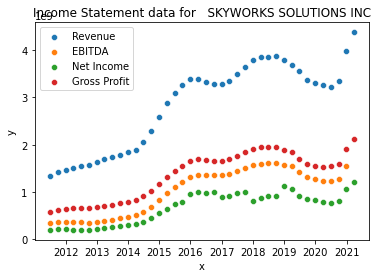

In [9]:
# plot the charts I like most
sns.scatterplot(data=income_df,x=income_df.index,y='Revenue')
sns.scatterplot(data=income_df,x=income_df.index,y='EBITDA')
sns.scatterplot(data=income_df,x=income_df.index,y='Net Income Common')
sns.scatterplot(data=income_df,x=income_df.index,y='Gross Profit').set(xlabel='x',ylabel='y')
plt.legend(labels=['Revenue','EBITDA','Net Income','Gross Profit']);

# this code is optional, it may bounce errors
ticker_name = stock_list[stock_list['Ticker']==ticker]['Name'].to_string()
plt.title(f'Income Statement data for {ticker_name[5:]}');

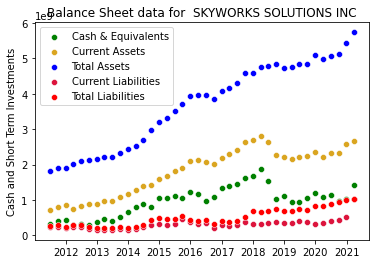

In [10]:
sns.scatterplot(data=balance_df,x=balance_df.index,y="Cash and Short Term Investments", color='green')
sns.scatterplot(data=balance_df,x=balance_df.index,y="Total current assets", color='goldenrod')
sns.scatterplot(data=balance_df,x=balance_df.index,y="Total Assets", color='blue')
sns.scatterplot(data=balance_df,x=balance_df.index,y="Total current liabilities", color='crimson')
sns.scatterplot(data=balance_df,x=balance_df.index,y="Total liabilities",color='red')
plt.legend(labels=['Cash & Equivalents','Current Assets','Total Assets','Current Liabilities','Total Liabilities']);

# this code is optional, 
# it may bounce errors if the ticker isn't in stocks_list 
# try big familiar tickers like JNJ or INTC to calibrate 
ticker_name = stock_list[stock_list['Ticker']==ticker]['Name'].to_string()
plt.title(f'Balance Sheet data for {ticker_name[6:]}');

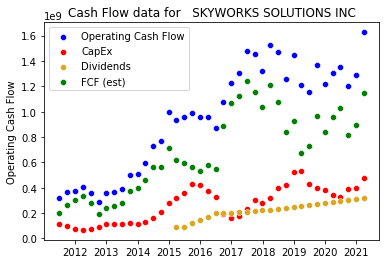

In [11]:
sns.scatterplot(data=cashflow_df,x=cashflow_df.index,y="Operating Cash Flow", color='blue')
sns.scatterplot(data=cashflow_df,x=cashflow_df.index,y=-cashflow_df["Capital expenditures"], color='red')
sns.scatterplot(data=cashflow_df,x=cashflow_df.index,y=-cashflow_df["Dividends Paid (Total)"], color='goldenrod')
sns.scatterplot(data=cashflow_df,x=cashflow_df.index,y=cashflow_df["Operating Cash Flow"]+cashflow_df["Capital expenditures"], color='green')
plt.legend(labels=['Operating Cash Flow','CapEx','Dividends','FCF (est)']);

# this code is optional, 
# it may bounce errors if the ticker isn't in stocks_list 
# try big familiar tickers like JNJ or INTC to calibrate 
ticker_name = stock_list[stock_list['Ticker']==ticker]['Name'].to_string()
plt.title(f'Cash Flow data for {ticker_name[5:]}');

### I want to create code that pulls each financial statement into a DataFrame
Each company should have three .xlsx files that were downloaded with the code above:
- Income Statement
- Balance Sheet
- Cash Flow Statement

Now I want to pull these financial tables into DataFrames

In [7]:
# I dropped some rows that give errors
ticker_list = stock_list.drop(index=[7,84,309,486,340])['Ticker'][:495]

In [8]:
stock_list[stock_list['Ticker'] == 'IAC']

,Ticker,Name,Sector,Asset Class,Market Value,Weight (%),Notional Value,Shares,CUSIP,ISIN,SEDOL,Price,Location,Exchange,Currency,FX Rate,Market Currency,Accrual Date
340,IAC,IAC INTERACTIVE,Communication,Equity,"19,530,188.30",0.05,"19,530,188.30","75,590.00",44891N109,US44891N1090,BMGTSK0,258.37,United States,NASDAQ,USD,1,USD,--


#### Creating dictionaries to call DataFrames

In [10]:
# this code creates empty dictionaries
# then loops to create DataFrames based on tickers and .xlsx files already downloaded
inc_dict = {}
bal_dict = {}
cfl_dict = {}

# income statement loop
for ticker in ticker_list:
    try:
        inc_dict[ticker] = pd.read_excel(f'./Income/{ticker}_inc.xlsx').T
    except:
        print(f'{ticker} is a bad Income Statement ticker')

# balance sheet loop
for ticker in ticker_list:
    try:
        bal_dict[ticker] = pd.read_excel(f'./BalanceSheet/{ticker}_bal.xlsx').T
    except:
        print(f'{ticker} is a bad Balance Sheet ticker')

# cash flow statement list
for ticker in ticker_list:
    try:
        cfl_dict[ticker] = pd.read_excel(f'./CashFlow/{ticker}_cashflow.xlsx').T
    except:
        print(f'{ticker} is a bad Cash Flow ticker')

#### This bit of code sets the columns for each DataFrame inside its respective dictionary

Specifically, the raw data is offset by one row, such that the 'columns' are a numbered range and the true variable names are in row 1. This code sets the columns to be the first row, then deletes the first row

In [11]:
# income statement dataframes
for ticker in ticker_list:
    try:
        inc_dict[f"{ticker}"].columns = inc_dict[f"{ticker}"].iloc[0]
        inc_dict[f"{ticker}"] = inc_dict[f"{ticker}"].iloc[1:]
    except:
        print(f'{ticker} did not work')

# balance sheet dataframes
for ticker in ticker_list:
    try:
        bal_dict[f"{ticker}"].columns = bal_dict[f"{ticker}"].iloc[0]
        bal_dict[f"{ticker}"] = bal_dict[f"{ticker}"].iloc[1:]
    except:
        print(f'{ticker} did not work')

# cash flow statement dataframes
for ticker in ticker_list:
    try:
        cfl_dict[f"{ticker}"].columns = cfl_dict[f"{ticker}"].iloc[0]
        cfl_dict[f"{ticker}"] = cfl_dict[f"{ticker}"].iloc[1:]
    except:
        print(f'{ticker} did not work')

#### This piece of code determines which financial data is similar across companies
Should we use "EBIT" or "EBITDA" or "EBT" to compare metrics across companies? First let's determine, what are the most common metrics among DataFrames? We'll need a sort of logic table to help us count.

I'm using AAPL and MSFT as calibration since they are two very large market caps, and they should have similarly-named data. The *intersection* between AAPL columns and MSFT columns will be the column headers for my new DataFrame.

##### Start with Income Statement

In [12]:
AAPL_intersect_MSFT = set(inc_dict['AAPL'].columns).intersection(set(inc_dict['MSFT'].columns))

inc_df_list = pd.DataFrame(index=ticker_list, columns = list(AAPL_intersect_MSFT))


for i in inc_df_list.index:        # tickers
    for j in inc_df_list.columns:  # financial variables
        if j in inc_dict[i].columns:
            inc_df_list.loc[i][j] = True
        else:
            inc_df_list.loc[i][j] = False

inc_df_list

,"EPS (Basic, from Continuous Ops)",Operating Cash Flow Margin,Interest Expense (Operating),Income from Continuous Operations,EBT,EBITDA,Non-operating Income/Expense,Consolidated Net Income/Loss,SG&A Expenses,EBITDA Margin,...,R&D Expenses,EBIT Margin,Gross Margin,Gross Profit,"EPS (Basic, Consolidated)",Non-operating Interest Expenses,Net Income Common,Cost of Revenue,Income after Tax,Operating Income
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
MSFT,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
AMZN,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
FB,True,True,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
GOOGL,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AAL,True,True,True,True,True,True,True,True,True,True,...,False,True,True,True,True,True,True,True,True,True
MOH,True,True,False,True,True,True,True,True,True,True,...,False,True,True,True,True,True,True,True,True,True
WSM,True,True,True,True,True,True,True,True,True,True,...,False,True,True,True,True,True,True,True,True,True


In [13]:
inc_df_list.sum()

EPS (Basic, from Continuous Ops)     494.0
Operating Cash Flow Margin           495.0
Interest Expense (Operating)         373.0
Income from Continuous Operations    494.0
EBT                                  495.0
EBITDA                               471.0
Non-operating Income/Expense         477.0
Consolidated Net Income/Loss         495.0
SG&A Expenses                        487.0
EBITDA Margin                        495.0
Income Tax Provision                 488.0
Net Profit Margin                    495.0
Free Cash Flow Margin                495.0
EPS (Basic)                          495.0
EBIT                                 470.0
EBT margin                           495.0
EPS (Diluted, from Cont. Ops)        494.0
Revenue                              495.0
R&D Expenses                         215.0
EBIT Margin                          495.0
Gross Margin                         495.0
Gross Profit                         495.0
EPS (Basic, Consolidated)            494.0
Non-operati

##### Same for Balance Sheet

In [14]:
AAPL_intersect_MSFT = set(bal_dict['AAPL'].columns).intersection(set(bal_dict['MSFT'].columns))

bal_df_list = pd.DataFrame(index=ticker_list, columns = list(AAPL_intersect_MSFT))


for i in bal_df_list.index:        # tickers
    for j in bal_df_list.columns:  # financial variables
        if j in bal_dict[i].columns:
            bal_df_list.loc[i][j] = True
        else:
            bal_df_list.loc[i][j] = False

bal_df_list

,Accounts Payable,Long Term Tax Liability (Deferred),Inventory,Shareholders Equity (Total),Retained Earnings,Total non-current liabilities,Total Assets,Non-current Liabilities (Other),Current Revenue (Deferred),Non-current Revenue (Deferred),...,Long-Term Investments,Shares (Common),Long-term assets (Other),Cash and Short Term Investments,Total liabilities,"Property, Plant, Equpment (Net)",Long Term Debt (Total),Receivables,Accrued Expenses,Common Stock (Net)
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
MSFT,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
AMZN,True,True,True,True,True,True,True,True,False,True,...,True,True,True,True,True,True,True,True,True,True
FB,True,True,False,True,True,True,True,True,True,False,...,True,True,True,True,True,True,True,True,True,True
GOOGL,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AAL,True,True,True,True,True,True,True,True,False,True,...,True,True,True,True,True,True,True,True,True,True
MOH,True,True,False,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,False,True
WSM,True,True,True,True,True,True,True,True,False,True,...,False,True,True,True,True,True,True,True,True,True


In [15]:
bal_df_list.sum()

Accounts Payable                               491.0
Long Term Tax Liability (Deferred)             434.0
Inventory                                      342.0
Shareholders Equity (Total)                    495.0
Retained Earnings                              494.0
Total non-current liabilities                  495.0
Total Assets                                   495.0
Non-current Liabilities (Other)                494.0
Current Revenue (Deferred)                     182.0
Non-current Revenue (Deferred)                 257.0
Other current assets                           420.0
Total current liabilities                      495.0
Other current liabilities                      441.0
Goodwill and Intangible Assets (Total)         473.0
Current Part of Debt                           486.0
Shareholders Equity and Liabilities (Total)    495.0
Total Debt                                     495.0
Shareholders Equity (Tangible)                 495.0
Common Equity (Total)                         

In [16]:
bal_dict['AAPL'].iloc[3]

Unnamed: 0
Cash and Short Term Investments                 9.3054e+10
Receivables                                     3.2075e+10
Inventory                                        3.289e+09
Other current assets                            1.0958e+10
Total current assets                           1.40065e+11
Property, Plant, Equpment (Net)                 4.3851e+10
Long-Term Investments                          1.02219e+11
Goodwill and Intangible Assets (Total)                 NaN
Long-term assets (Other)                        3.1209e+10
Total non-current assets                       1.77279e+11
Total Assets                                   3.17344e+11
Accounts Payable                                3.8058e+10
Accrued Expenses                                       NaN
Current Part of Debt                            2.0048e+10
Current Revenue (Deferred)                       6.313e+09
Other current liabilities                       3.9945e+10
Total current liabilities                    

##### Same for Cash Flow Statement

In [17]:
AAPL_intersect_MSFT = set(cfl_dict['AAPL'].columns).intersection(set(cfl_dict['MSFT'].columns))

cfl_df_list = pd.DataFrame(index=ticker_list, columns = list(AAPL_intersect_MSFT))


for i in cfl_df_list.index:        # tickers
    for j in cfl_df_list.columns:  # financial variables
        if j in cfl_dict[i].columns:
            cfl_df_list.loc[i][j] = True
        else:
            cfl_df_list.loc[i][j] = False

cfl_df_list

,Other financial activities,Assets Liabilities Change (Total),"Equity Repurchase (Common, Net)",Net Income,Net Aquisitions,Long-Term Investments Change (Net),Repayment/Issuance of Debt (Net),Ending Cash,Dividends Paid (Total),Accounts Receivable Change,...,Depreciation & Amortization,Financing cash flow,Accounts Payable Change,Beginning Cash,Change in inventories,Non Cash Items (Other),Capital expenditures,Operating Cash Flow,Change in Cash,Stock Based Compensation
Ticker,,,,,,,,,,,,,,,,,,,,,
AAPL,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
MSFT,True,True,True,True,True,True,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True
AMZN,True,True,True,True,True,True,True,True,False,True,...,True,True,True,True,True,True,True,True,True,True
FB,True,True,True,True,True,True,True,True,False,True,...,True,True,True,True,False,True,True,True,True,True
GOOGL,True,True,True,True,True,True,True,True,False,True,...,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AAL,True,True,True,True,False,True,True,True,True,True,...,True,True,False,True,True,True,True,True,True,True
MOH,True,True,True,True,True,True,True,True,False,True,...,True,True,True,True,False,True,True,True,True,True
WSM,True,True,True,True,False,False,True,True,True,True,...,True,True,True,True,True,True,True,True,True,True


In [18]:
cfl_df_list.sum()

Other financial activities                  495.0
Assets Liabilities Change (Total)           493.0
Equity Repurchase (Common, Net)             487.0
Net Income                                  495.0
Net Aquisitions                             439.0
Long-Term Investments Change (Net)          349.0
Repayment/Issuance of Debt (Net)            487.0
Ending Cash                                 494.0
Dividends Paid (Total)                      375.0
Accounts Receivable Change                  466.0
Capital Stock Change                        488.0
Dividends Paid (Common)                     495.0
Other investing activities                  478.0
Change in payables and accrued liability    460.0
Change in other assets and liabilities      489.0
Investing cash flow                         495.0
Issuance/Purchase of Shares                 492.0
Investments Change (Net)                    432.0
Depreciation & Amortization                 494.0
Financing cash flow                         495.0


In [19]:
cfl_dict['AAPL'].iloc[2]

Unnamed: 0
Net Income                                   5.7411e+10
Depreciation & Amortization                  1.1056e+10
Non Cash Items (Other)                        6.517e+09
Accounts Receivable Change                    4.568e+09
Change in inventories                        1.1246e+10
Accounts Payable Change                      -4.062e+09
Change in payables and accrued liability    1.51091e+11
Change in other assets and liabilities        5.311e+09
Operating Cash Flow                          8.0674e+10
Capital expenditures                         -7.309e+09
Change in intangibles (net)                         NaN
Net Aquisitions                              -1.524e+09
Short Term Investments Change (Net)           5.453e+09
Long-Term Investments Change (Net)            -3.41e+08
Other investing activities                   -3.233e+09
Investing cash flow                          -4.289e+09
Repayment/Issuance of Debt (Net)              2.499e+09
Equity Repurchase (Common, Net)      

In [22]:
cfl_df_list.sum()

Other financial activities                  495.0
Assets Liabilities Change (Total)           493.0
Equity Repurchase (Common, Net)             487.0
Net Income                                  495.0
Net Aquisitions                             439.0
Long-Term Investments Change (Net)          349.0
Repayment/Issuance of Debt (Net)            487.0
Ending Cash                                 494.0
Dividends Paid (Total)                      375.0
Accounts Receivable Change                  466.0
Capital Stock Change                        488.0
Dividends Paid (Common)                     495.0
Other investing activities                  478.0
Change in payables and accrued liability    460.0
Change in other assets and liabilities      489.0
Investing cash flow                         495.0
Issuance/Purchase of Shares                 492.0
Investments Change (Net)                    432.0
Depreciation & Amortization                 494.0
Financing cash flow                         495.0


##### Columns to keep

In [23]:
inc_columns = ['Revenue','Gross Profit','Operating Income','Income Tax Provision', 'Net Income Common']
bal_columns = ['Total Assets','Total current assets','Total liabilities','Total current liabilities',
               'Shareholders Equity (Total)','Shares (Common)']
cfl_columns = ['Dividends Paid (Common)','Capital expenditures','Operating Cash Flow','Equity Repurchase (Common, Net)','Change in inventories']

In [26]:
inc_dict['AAPL'][inc_columns].head()

Unnamed: 0,Revenue,Gross Profit,Operating Income,Income Tax Provision,Net Income Common
2021-03-31 00:00:00,3.25208e+11,1.26601e+11,8.8903e+10,1.3317e+10,7.6311e+10
2020-12-31 00:00:00,2.93971e+11,1.13735e+11,7.4253e+10,1.0822e+10,6.393e+10
2020-09-30 00:00:00,2.74247e+11,1.04275e+11,6.6288e+10,9.68e+09,5.7411e+10
2020-06-30 00:00:00,2.73621e+11,1.03994e+11,6.7138e+10,9.893e+09,5.8424e+10
2020-03-31 00:00:00,2.68015e+11,1.02173e+11,6.5591e+10,9.876e+09,5.7215e+10


In [29]:
bal_dict['AAPL'][bal_columns].head()

Unnamed: 0,Total Assets,Total current assets,Total liabilities,Total current liabilities,Shareholders Equity (Total),Shares (Common)
2021-03-31 00:00:00,3.37158e+11,1.21465e+11,2.6798e+11,1.06385e+11,6.9178e+10,1.66863e+10
2020-12-31 00:00:00,3.54054e+11,1.54106e+11,2.8783e+11,1.32507e+11,6.6224e+10,1.68233e+10
2020-09-30 00:00:00,3.23888e+11,1.43713e+11,2.58549e+11,1.05392e+11,6.5339e+10,1.69768e+10
2020-06-30 00:00:00,3.17344e+11,1.40065e+11,2.45062e+11,9.5318e+10,7.2282e+10,1.71358e+10
2020-03-31 00:00:00,3.204e+11,1.43753e+11,2.41975e+11,9.6094e+10,7.8425e+10,1.7296e+10


In [27]:
cfl_dict['AAPL'][cfl_columns].head()

Unnamed: 0,Dividends Paid (Common),Capital expenditures,Operating Cash Flow,"Equity Repurchase (Common, Net)",Change in inventories
2021-03-31 00:00:00,-1.4227e+10,-9.118e+09,9.9591e+10,-7.539e+10,1.6179e+10
2020-12-31 00:00:00,-1.4155e+10,-8.702e+09,8.8921e+10,-7.5549e+10,1.5297e+10
2020-09-30 00:00:00,-1.4081e+10,-7.309e+09,8.0674e+10,-7.1478e+10,1.1246e+10
2020-06-30 00:00:00,-1.4049e+10,-8.302e+09,8.0008e+10,-7.1795e+10,6.537e+09
2020-03-31 00:00:00,-1.4022e+10,-8.737e+09,7.5373e+10,-7.2858e+10,4.75e+09


In [34]:
pd.concat([inc_dict['AAPL'][inc_columns],bal_dict['AAPL'][bal_columns],cfl_dict['AAPL'][cfl_columns]], axis=1)

Unnamed: 0,Revenue,Gross Profit,Operating Income,Income Tax Provision,Net Income Common,Total Assets,Total current assets,Total liabilities,Total current liabilities,Shareholders Equity (Total),Shares (Common),Dividends Paid (Common),Capital expenditures,Operating Cash Flow,"Equity Repurchase (Common, Net)",Change in inventories
2021-03-31 00:00:00,3.25208e+11,1.26601e+11,8.8903e+10,1.3317e+10,7.6311e+10,3.37158e+11,1.21465e+11,2.6798e+11,1.06385e+11,6.9178e+10,1.66863e+10,-1.4227e+10,-9.118e+09,9.9591e+10,-7.539e+10,1.6179e+10
2020-12-31 00:00:00,2.93971e+11,1.13735e+11,7.4253e+10,1.0822e+10,6.393e+10,3.54054e+11,1.54106e+11,2.8783e+11,1.32507e+11,6.6224e+10,1.68233e+10,-1.4155e+10,-8.702e+09,8.8921e+10,-7.5549e+10,1.5297e+10
2020-09-30 00:00:00,2.74247e+11,1.04275e+11,6.6288e+10,9.68e+09,5.7411e+10,3.23888e+11,1.43713e+11,2.58549e+11,1.05392e+11,6.5339e+10,1.69768e+10,-1.4081e+10,-7.309e+09,8.0674e+10,-7.1478e+10,1.1246e+10
2020-06-30 00:00:00,2.73621e+11,1.03994e+11,6.7138e+10,9.893e+09,5.8424e+10,3.17344e+11,1.40065e+11,2.45062e+11,9.5318e+10,7.2282e+10,1.71358e+10,-1.4049e+10,-8.302e+09,8.0008e+10,-7.1795e+10,6.537e+09
2020-03-31 00:00:00,2.68015e+11,1.02173e+11,6.5591e+10,9.876e+09,5.7215e+10,3.204e+11,1.43753e+11,2.41975e+11,9.6094e+10,7.8425e+10,1.7296e+10,-1.4022e+10,-8.737e+09,7.5373e+10,-7.2858e+10,4.75e+09


In [36]:
full_df_dict = {}
bad_tickers = []
for ticker in ticker_list:
    try:
        full_df_dict[ticker] = pd.concat([inc_dict[ticker][inc_columns],bal_dict[ticker][bal_columns],cfl_dict[ticker][cfl_columns]], axis=1)
    except:
        print(f"{ticker} threw an error")
        bad_tickers.append(ticker)

FB threw an error
JPM threw an error
V threw an error
UNH threw an error
MA threw an error
PYPL threw an error
CMCSA threw an error
ADBE threw an error
NFLX threw an error
T threw an error
CRM threw an error
WFC threw an error
ACN threw an error
UPS threw an error
INTU threw an error
AMT threw an error
NOW threw an error
BKNG threw an error
AXP threw an error
FIS threw an error
CHTR threw an error
ANTM threw an error
UBER threw an error
PLD threw an error
USB threw an error
ADP threw an error
CCI threw an error
PNC threw an error
CB threw an error
CME threw an error
FISV threw an error
MMC threw an error
ZM threw an error
COF threw an error
ICE threw an error
ADSK threw an error
EQIX threw an error
TWLO threw an error
PGR threw an error
SNAP threw an error
HUM threw an error
MRNA threw an error
AON threw an error
TWTR threw an error
MCO threw an error
WDAY threw an error
MET threw an error
IQV threw an error
DOCU threw an error
MTCH threw an error
CTSH threw an error
PSA threw an error

In [38]:
len(bad_tickers)

154

In [43]:
for key in full_df_dict.keys():
    print(key)

AAPL
MSFT
AMZN
GOOGL
GOOG
TSLA
JNJ
NVDA
HD
DIS
PG
BAC
XOM
INTC
VZ
PFE
CSCO
ABT
KO
CVX
ABBV
MRK
PEP
TMO
WMT
AVGO
MDT
MCD
TXN
NKE
DHR
COST
QCOM
HON
C
UNP
LIN
NEE
BMY
PM
LOW
LLY
AMGN
ORCL
SBUX
BA
IBM
CAT
RTX
MS
AMAT
GS
DE
GE
BLK
MMM
SCHW
ISRG
AMD
TGT
SQ
CVS
MU
LMT
SPGI
LRCX
CI
MO
MDLZ
SYK
TJX
ZTS
GILD
TFC
CSX
TMUS
DUK
BDX
GM
EL
COP
NSC
ATVI
FDX
SO
ITW
CL
SHW
GPN
APD
BSX
D
BX
EW
ILMN
ADI
ETN
FCX
VRTX
EMR
ECL
NXPI
WM
HCA
NOC
DG
REGN
NEM
KLAC
F
IDXX
DOW
ROP
JCI
ROST
TEL
BAX
EXC
ALGN
KMB
EOG
GD
HPQ
AEP
SYY
LHX
DD
MCHP
TT
CMG
EA
DXCM
SRE
PH
APH
PPG
A
TROW
BIIB
LULU
STZ
ROKU
APTV
BK
SLB
XEL
SNPS
CMI
WBA
ORLY
GIS
MRVL
ZBH
CDNS
LUV
MPC
CTVA
ALXN
IFF
MNST
YUM
ADM
PSX
GLW
KMI
TDG
SWK
XLNX
PXD
AZO
SWKS
MSI
DHI
AME
PCAR
MTD
CTAS
ROK
VLO
KKR
RMD
BLL
MCK
DAL
WY
WMB
WEC
FAST
ES
STT
AMP
VFC
LEN
AWK
CBRE
FITB
KR
LYB
KSU
PTON
KEYS
FTNT
ZBRA
BBY
DLTR
DTE
RNG
LH
ED
CDW
MXIM
CPRT
VIAC
NUE
VMC
WST
URI
DELL
CERN
OKE
HSY
TSN
EXAS
PPL
W
IP
QRVO
MKC
CCL
RSG
OXY
MLM
EIX
TER
KMX
TSCO
DOV
CLX
BURL
ETR
WDC
HPE
CHD
AEE

# DO NOT CALL THIS FUNCTION

# DO NOT CALL THIS FUNCTION

# DO NOT CALL THIS FUNCTION

# DO NOT CALL THIS FUNCTION

# DO NOT CALL THIS FUNCTION

# DO NOT CALL THIS FUNCTION

# DO NOT CALL THIS FUNCTION

# DO NOT CALL THIS FUNCTION

# DO NOT CALL THIS FUNCTION

# DO NOT CALL THIS FUNCTION

### (unless it's on purpose, of course)

In [14]:
#code to pull data in bulk
def bulk_stockrow_puller():
    ticker_list = stock_list['Ticker'][:500]
    bad_list = []

    for ticker in ticker_list:
        try:
            url_inc=f'https://stockrow.com/api/companies/{ticker}/financials.xlsx?dimension=T&section=Income%20Statement&sort=desc'
            response_inc = requests.get(url_inc)
            with open(os.path.join("Income", f"{ticker}_inc.xlsx"), 'wb') as f:
                f.write(response_inc.content)

            url_bal=f'https://stockrow.com/api/companies/{ticker}/financials.xlsx?dimension=Q&section=Balance%20Sheet&sort=desc'    
            response_bal = requests.get(url_bal)
            with open(os.path.join("BalanceSheet", f"{ticker}_bal.xlsx"), 'wb') as f:
                f.write(response_bal.content)

            url_cfl=f'https://stockrow.com/api/companies/{ticker}/financials.xlsx?dimension=T&section=Cash%20Flow&sort=desc'
            response_cfl = requests.get(url_cfl)
            with open(os.path.join("CashFlow", f"{ticker}_cashflow.xlsx"), 'wb') as f:
                f.write(response_cfl.content)
            time.sleep(0.25)
        except:
            print(f"{ticker} is bad")
            bad_list.append(ticker)